In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

In [2]:
# Defining the path for xml file with address points for lubuskie voivodeship in Poland
lubuskie_xml_path = "C:/flood_analysis/PRG-punkty_adresowe/17.01.2024_08_30_23__08_lubuskie.xml"

In [3]:
# Parsing xml file using the ElementTree module
tree = ET.parse(lubuskie_xml_path)

# Getting the root element of the XML tree
root = tree.getroot()

In [4]:
# Checking all unique first-level child elements that are a part of featureMembers

feature_unique_elements = set()

for feature_members_element in root.findall(".//gml:featureMembers", namespaces={'gml': 'http://www.opengis.net/gml/3.2'}):
    # Iterating through the first-level child elements
    for child_element in feature_members_element:
        feature_unique_elements.add(child_element.tag)
        
feature_unique_elements

{'{urn:gugik:specyfikacje:gmlas:panstwowyRejestrGranicAdresy:1.0}PRG_JednostkaAdministracyjnaNazwa',
 '{urn:gugik:specyfikacje:gmlas:panstwowyRejestrGranicAdresy:1.0}PRG_MiejscowoscNazwa',
 '{urn:gugik:specyfikacje:gmlas:panstwowyRejestrGranicAdresy:1.0}PRG_PunktAdresowy',
 '{urn:gugik:specyfikacje:gmlas:panstwowyRejestrGranicAdresy:1.0}PRG_UlicaNazwa'}

In [4]:
# Filtering out only locations that were geocoded at the highest level of accuracy 
# locations with tag namespace "PRG_PunktAdresowy" (eng: address point)

# Before filtering - identification of the element within geographical coordinates data are stored
address_point_unique_elements = set()

for address_point_members_element in root.findall(".//prg-ad:PRG_PunktAdresowy", namespaces={'prg-ad': 'urn:gugik:specyfikacje:gmlas:panstwowyRejestrGranicAdresy:1.0'}):
    # Iterating through the first-level child elements
    for child_element in address_point_members_element:
        address_point_unique_elements.add(child_element.tag)
        
address_point_unique_elements

# Geographical coordinates data are stored in this element within 'pozycja' tag (eng. position)


{'{http://www.opengis.net/gml/3.2}identifier',
 '{urn:gugik:specyfikacje:gmlas:panstwowyRejestrGranicAdresy:1.0}cyklZycia',
 '{urn:gugik:specyfikacje:gmlas:panstwowyRejestrGranicAdresy:1.0}czescMiejscowosci',
 '{urn:gugik:specyfikacje:gmlas:panstwowyRejestrGranicAdresy:1.0}idIIP',
 '{urn:gugik:specyfikacje:gmlas:panstwowyRejestrGranicAdresy:1.0}jednostkaAdmnistracyjna',
 '{urn:gugik:specyfikacje:gmlas:panstwowyRejestrGranicAdresy:1.0}kodPocztowy',
 '{urn:gugik:specyfikacje:gmlas:panstwowyRejestrGranicAdresy:1.0}komponent',
 '{urn:gugik:specyfikacje:gmlas:panstwowyRejestrGranicAdresy:1.0}miejscowosc',
 '{urn:gugik:specyfikacje:gmlas:panstwowyRejestrGranicAdresy:1.0}numerPorzadkowy',
 '{urn:gugik:specyfikacje:gmlas:panstwowyRejestrGranicAdresy:1.0}obiektEMUiA',
 '{urn:gugik:specyfikacje:gmlas:panstwowyRejestrGranicAdresy:1.0}pozycja',
 '{urn:gugik:specyfikacje:gmlas:panstwowyRejestrGranicAdresy:1.0}status',
 '{urn:gugik:specyfikacje:gmlas:panstwowyRejestrGranicAdresy:1.0}ulica',
 '{urn:g

In [6]:
# Retrieving selected data for each address point (PRG_PunktAdresowy)

Address_points_list = []

# Iterating through each 'PRG_PunktAdresowy' element
for prg_ad_element in root.findall(".//prg-ad:PRG_PunktAdresowy", namespaces={'prg-ad': 'urn:gugik:specyfikacje:gmlas:panstwowyRejestrGranicAdresy:1.0'}):
    # Extracting selected information from each element
    place = prg_ad_element.find(".//prg-ad:miejscowosc", namespaces={'prg-ad': 'urn:gugik:specyfikacje:gmlas:panstwowyRejestrGranicAdresy:1.0'}).text
    street = prg_ad_element.find(".//prg-ad:ulica", namespaces={'prg-ad': 'urn:gugik:specyfikacje:gmlas:panstwowyRejestrGranicAdresy:1.0'}).text
    record_number = prg_ad_element.find(".//prg-ad:numerPorzadkowy", namespaces={'prg-ad': 'urn:gugik:specyfikacje:gmlas:panstwowyRejestrGranicAdresy:1.0'}).text
    postal_code = prg_ad_element.find(".//prg-ad:kodPocztowy", namespaces={'prg-ad': 'urn:gugik:specyfikacje:gmlas:panstwowyRejestrGranicAdresy:1.0'}).text
    position = prg_ad_element.find(".//gml:pos", namespaces={'gml': 'http://www.opengis.net/gml/3.2'}).text
    #Iterating through each 'JednostkaAdministracyjna' element
    adm_unit_elements = prg_ad_element.findall(".//prg-ad:jednostkaAdmnistracyjna", namespaces={'prg-ad': 'urn:gugik:specyfikacje:gmlas:panstwowyRejestrGranicAdresy:1.0'})
    adm_unit_list = [element.text if element is not None else None for element in adm_unit_elements]
    
    # Appending extracted data to the list
    Address_points_list.append({
        'Place': place,
        'Street': street,
        'RecordNumber': record_number,
        'PostalCode': postal_code,
        'AdministrativeUnit': adm_unit_list,
        'Position': position
    })

# Create a DataFrame from the list
Address_Points_df = pd.DataFrame(Address_points_list)

# Display the DataFrame
Address_Points_df.head()

,Place,Street,RecordNumber,PostalCode,AdministrativeUnit,Position
0,Lubsko,Traugutta,2,68-300,"[Polska, lubuskie, żarski, Lubsko]",443323.5373 222667.8081
1,Lubsko,Traugutta,3,68-300,"[Polska, lubuskie, żarski, Lubsko]",443348.3894 222685.2913
2,Lubsko,Traugutta,1,68-300,"[Polska, lubuskie, żarski, Lubsko]",443276.578500001 222610.4461
3,Lubsko,Parkowa,1,68-300,"[Polska, lubuskie, żarski, Lubsko]",442911.345000001 222874.3781
4,Lubsko,Zapolskiej,4,68-300,"[Polska, lubuskie, żarski, Lubsko]",442848.489800001 222843.0792


In [7]:
# Checking if there are missing data in the Position column with geographical coordinates
Address_Points_df['Position'].isnull().sum()

0

In [9]:
# Calculating the sum of address points with coords 
# to check for how many locations the geographical coordinates can be extracted
sum_address_points = len(Address_Points_df)
print("Geographical coordinates can be extracted for {} locations.".format(sum_address_points))

Geographical coordinates can be extracted for 193533 locations.


In [10]:
# Extracting Y and X from the 'Position' column to use them when creating GeoDataFrame
Address_Points_df[['Y','X']] = Address_Points_df['Position'].str.split(expand=True).astype(float)
Address_Points_df.head()

,Place,Street,RecordNumber,PostalCode,AdministrativeUnit,Position,Y,X
0,Lubsko,Traugutta,2,68-300,"[Polska, lubuskie, żarski, Lubsko]",443323.5373 222667.8081,443323.5373,222667.8081
1,Lubsko,Traugutta,3,68-300,"[Polska, lubuskie, żarski, Lubsko]",443348.3894 222685.2913,443348.3894,222685.2913
2,Lubsko,Traugutta,1,68-300,"[Polska, lubuskie, żarski, Lubsko]",443276.578500001 222610.4461,443276.5785,222610.4461
3,Lubsko,Parkowa,1,68-300,"[Polska, lubuskie, żarski, Lubsko]",442911.345000001 222874.3781,442911.3450,222874.3781
4,Lubsko,Zapolskiej,4,68-300,"[Polska, lubuskie, żarski, Lubsko]",442848.489800001 222843.0792,442848.4898,222843.0792


<Axes: >

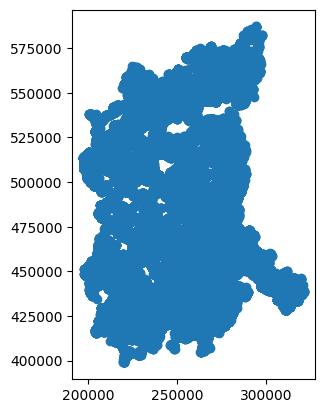

In [11]:
# Creating GeoDataFrame with address points
Address_Points_gdf = gpd.GeoDataFrame(
    Address_Points_df, geometry=gpd.points_from_xy(Address_Points_df.X, Address_Points_df.Y), crs='EPSG:2180')
Address_Points_gdf.plot()

In [14]:
# Uploading second level admistrative boundaries (powiaty) shapefile
boundaries = gpd.read_file("C:/flood_analysis/powiaty.zip")

In [16]:
# Checking if CRS of both GeoDataFrames matches
boundaries.crs == Address_Points_gdf.crs

True

In [17]:
# Conducting spatial join to join corresponding administrative area (powiat) name for each adress point
lubuskie_data = gpd.sjoin(Address_Points_gdf, boundaries, how='inner')

In [19]:
import rasterio

# Uploading rasters with flood data
rasters_path = 'C://flood_analysis/floodMap_RP{:03d}/floodmap_EFAS_RP{:03d}_C.tif'

# Storing the uploaded rasters in a dictionary
flood_maps = {}

# Iterating over the return periods to upload the rasters and add them to the dictionary
return_periods = [10,20,50,100,200,500]
for period in return_periods:
    file_path = rasters_path.format(period,period)
    flood_maps[f'floodMap_{period}'] = rasterio.open(file_path) 

In [20]:
# Checking rasters crs
print(flood_maps['floodMap_10'].crs)

PROJCS["ETRS89-extended / LAEA Europe",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4258"]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",52],PARAMETER["longitude_of_center",10],PARAMETER["false_easting",4321000],PARAMETER["false_northing",3210000],UNIT["metre",1],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3035"]]


In [22]:
# Reprojecting lubuskie_data crs to EPSG:3035 to match rasters crs
lubuskie_data = lubuskie_data.to_crs(crs=flood_maps['floodMap_10'].crs)
lubuskie_data.crs

<Projected CRS: PROJCS["ETRS89-extended / LAEA Europe",GEOGCS["ETR ...>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Azimuthal Equal Area
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

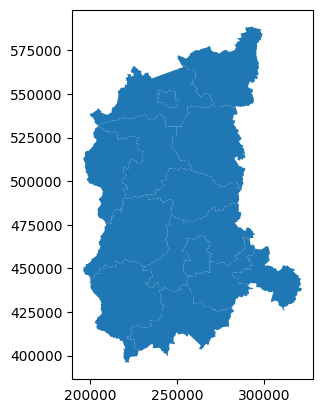

In [23]:
# Extracting second level administrative areas (powiaty) that are a part of lubuskie voivodeship
# As some of the powiats are having the same name within different voivodeships, GUS teritorial symbols are going to be used 
# to extract correct powiats within lubuskie voivodeship
units_lubuskie = boundaries.loc[boundaries['JPT_KOD_JE'].str.contains(
    "0801|0802|0803|0804|0805|0806|0807|0808|0812|0809|0810|0811|0861|0862",case=False)]

# Checking the data 
units_lubuskie.plot()

In [25]:
# Changing crs to EPSG:3035
units_lubuskie = units_lubuskie.to_crs(crs=lubuskie_data.crs)
units_lubuskie.crs

<Projected CRS: PROJCS["ETRS89-extended / LAEA Europe",GEOGCS["ETR ...>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Azimuthal Equal Area
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [26]:
from rasterio.mask import mask
from shapely.geometry import box, mapping

# Clipping rasters to extend of lubuskie voivodeship
# Creating polygon for lubuskie voivodeship + buffer (to include raster values on the borders of voivodeship)
geoms = units_lubuskie.dissolve().buffer(1000).geometry.values
geometry = geoms[0]
mask_geojson = mapping(geometry)

# Creating a dictionary to store clipped raster data
clipped_maps = {}

# Iterating over the return periods
for period in return_periods:
    with rasterio.open(flood_maps[f'floodMap_{period}'].name) as src:
        out_image, out_transform = rasterio.mask.mask(src, [mask_geojson], crop=True)
        out_meta = src.meta.copy()

    out_meta.update({
        "driver": 'GTiff',
        'height': out_image.shape[1],
        'width': out_image.shape[2],
        'transform': out_transform
    })

    output_file_path = 'C://flood_analysis/floodMap_RP{:03d}/floodmap_EFAS_RP{:03d}_clip.tif'.format(period, period)

    with rasterio.open(output_file_path, 'w', **out_meta) as dst:
        dst.write(out_image)

    # Adding the clipped raster data to the dictionary
    clipped_maps[f'clipped_floodMap_{period}'] = output_file_path

In [27]:
from rasterio import sample

# Extracting the raster value for each point for each return period raster using sample_gen() method

# Determining the path to clipped rasters
clipped_raster_path = 'C://flood_analysis/floodMap_RP{:03d}/floodmap_EFAS_RP{:03d}_clip.tif'

# Iterating over each clipped raster
for period in return_periods:
    path = clipped_raster_path.format(period,period)
    
    # Adding new column to store raster values
    lubuskie_data[f'flood{period}value'] = None
    
    # Iterating over address points 
    for index, row in lubuskie_data.iterrows():
        # Extracting x and y values of each point
        x = row['geometry'].x
        y = row['geometry'].y
        
        # Extracting the value of the raster for the point
        with rasterio.open(path) as src:
            values_gen = sample.sample_gen(src, [(x,y)], indexes=1)
            
            # Adding extracted value to the new column
            # for the uploaded rasters value = -340282306073709652508363335590014353408.0 is the placeholder that indicates
            # there is NoData or undefined values, so this value will be considered as None
            for value in values_gen:
                lubuskie_data.loc[index, f'flood{period}value'] = None if value is None or value[0] == -340282306073709652508363335590014353408.0 else value[0]

In [28]:
# Exporting the lubuskie_data to csv to store extracted values
lubuskie_data.to_csv('C://flood_analysis/lubuskie_data_extracted_values.csv', encoding='UTF-8', index=False)

In [29]:
# Adding new columns to determine if the flood value occured for each point
for period in return_periods:
    lubuskie_data[f'flood{period}value_occ'] = 0
    
    # If the value occured, new column will be filled with 1
    for index, row in lubuskie_data.iterrows():
        if row[f'flood{period}value'] is not None:
            lubuskie_data.at[index, f'flood{period}value_occ'] = 1  

In [30]:
# Counting the number of locations in each administrativ area (powiat) that is affected by each return period
# by creating a sum of the columns with occurance and group by name of powiat
sum_flood_by_powiat = lubuskie_data.groupby('JPT_NAZWA_')[
    ['flood10value_occ','flood20value_occ','flood50value_occ',
    'flood100value_occ','flood200value_occ','flood500value_occ']
].sum()

In [31]:
# The final results
sum_flood_by_powiat

,flood10value_occ,flood20value_occ,flood50value_occ,flood100value_occ,flood200value_occ,flood500value_occ
JPT_NAZWA_,,,,,,
powiat Gorzów Wielkopolski,2074,2457,2551,2622,2648,2684
powiat Zielona Góra,146,225,225,293,293,293
powiat gorzowski,1922,2206,2451,2617,2674,2817
powiat krośnieński,836,921,1302,1390,1417,1573
powiat międzyrzecki,1287,1570,2313,2391,2584,3047
powiat nowosolski,6319,6845,7317,7636,7711,7788
powiat strzelecko-drezdenecki,708,879,944,1108,1130,1149
powiat sulęciński,368,436,483,586,627,639
powiat słubicki,1470,1678,1948,1982,2023,2107


In [32]:
# Checking the number of points within each powiat (for future statistics)
locations_in_powiats = lubuskie_data['JPT_NAZWA_'].value_counts()
locations_in_powiats

JPT_NAZWA_
powiat Zielona Góra              20226
powiat gorzowski                 19228
powiat żarski                    18878
powiat zielonogórski             17764
powiat nowosolski                17289
powiat żagański                  14017
powiat krośnieński               12611
powiat Gorzów Wielkopolski       12265
powiat świebodziński             11345
powiat międzyrzecki              11337
powiat strzelecko-drezdenecki    10848
powiat słubicki                  10107
powiat wschowski                  9537
powiat sulęciński                 8081
Name: count, dtype: int64

In [33]:
# Saving the results to csv file
sum_flood_by_powiat.to_csv('C://flood_analysis/lubuskie_flood_powiats_results.csv', encoding='UTF-8')